In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [ ]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV



<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [3]:
cc_df = pd.read_csv("data/UCI_Credit_Card.csv")
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
# X = cc_df.drop(columns=['default.payment.next.month'])
# y = cc_df['default.payment.next.month']


X, y = train_test_split(
    cc_df, test_size=0.3, random_state=123
)

X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [5]:
X.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Our data does not have any missing values, so imputation is not required.

In [6]:
X.groupby('default.payment.next.month').agg('mean')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,,,,
0,15045.178580,178297.940167,1.612923,1.840853,1.560078,35.447891,-0.210704,-0.306891,-0.325834,-0.362862,...,47555.094654,43914.621138,40686.592692,38925.147008,6327.043097,6604.800331,5911.108754,5278.772315,5167.724068,5782.544752
1,14674.138225,131633.464164,1.558447,1.891425,1.532850,35.684940,0.664036,0.453712,0.364974,0.253626,...,45115.186007,41997.339804,39530.542875,38217.631826,3399.863695,3425.354522,3224.844710,3017.729309,3304.807381,3342.179181


The table above shows the mean of all predictor variables grouped by default payment status, highlighting differences in central values.

In [7]:
X.groupby('default.payment.next.month').agg('std')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,,,,
0,8672.671181,132225.852417,0.487096,0.808531,0.520626,9.063586,0.949811,1.027717,1.039210,1.004777,...,69335.797108,65087.408248,61203.110202,59592.708592,18613.931898,23898.217437,19999.338611,16628.104389,15709.333135,19333.945542
1,8568.646131,115831.120526,0.496625,0.734957,0.524814,9.712242,1.375039,1.505835,1.510261,1.519621,...,67954.746932,63971.240960,61129.843763,59573.313886,9351.216540,11579.425604,10755.375270,10053.387946,13321.017416,12846.708688


Similarly, the standard deviation table shows the spread of predictor variables based on default payment status, which will help us understand the variability of each variable and its potential impact on classification.

In [8]:
X['default.payment.next.month'].value_counts()

default.payment.next.month
0    16312
1     4688
Name: count, dtype: int64

Based on the table above, we can see that our response variable `default.payment.next.month` is imbalanced and we will have to adjust our classifier by applying weights to improve performance. 

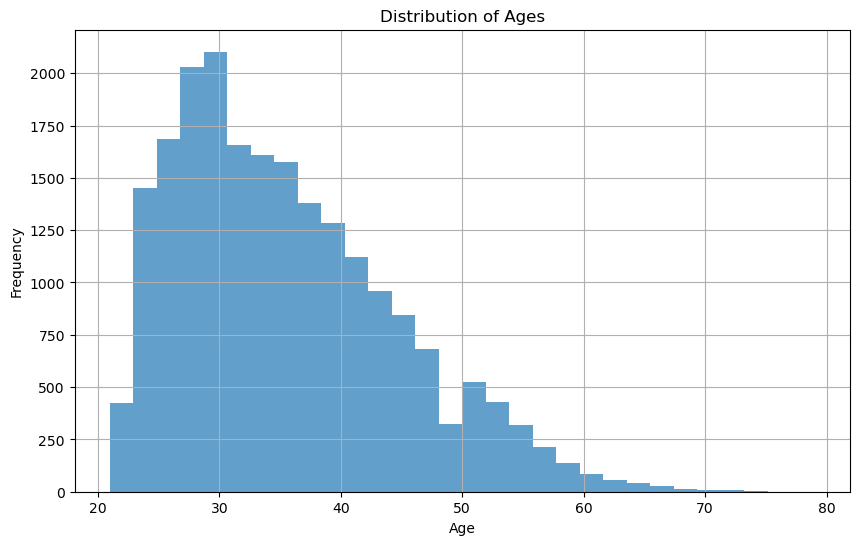

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(X['AGE'], bins=30, alpha=0.7)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The figure above shows the distribution of ages, and helps us understand the different ages represented in our dataset. 

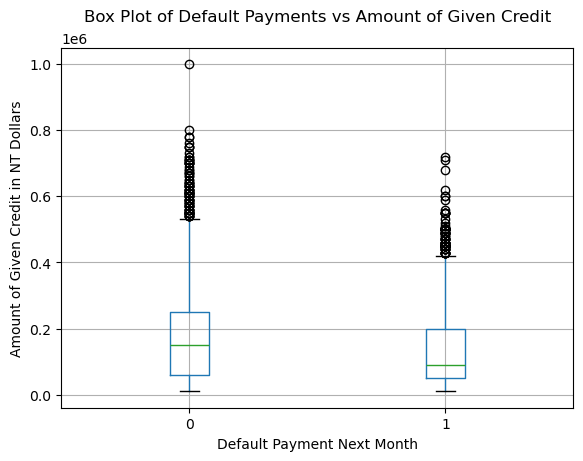

In [10]:
X.boxplot(column='LIMIT_BAL', by='default.payment.next.month')
plt.suptitle("Box Plot of Default Payments vs Amount of Given Credit") 
plt.title("")
plt.xlabel("Default Payment Next Month")
plt.ylabel("Amount of Given Credit in NT Dollars")
plt.show()

The figure above is a boxplot showing the distribution of given credit across groups, showing differences in center, spread, and the presence of outliers.

Based on the summary statistics, some variables appear to be more influential in classifying default payments, especially those with significant differences in mean values between the two default payment groups. For some of the variables like PAY_AMT, BILL_AMT, there is a huge difference between the two groups, whereas for some variables like AGE, the mean is pretty similar between the two, suggesting that it might not be as influential to the classifier. 

Additionally, standard deviations indicate variability, and variables with lower variability may contribute less to predicting default payments. We can also tell that the variables are in different scales, which highlights the importance of scaling our data when training our classifier. Overall, looking at the summary statistics helps gives us an idea on whether or not the variable is going to be influential in classifying the default payment variables.

Based on our plots, we can see that our data contains people of ages ~20 up until ~80, where most of the data are of people around age 35, as shown by the peak in our histogram. The box plot indicates that the given credit is fairly similar between default and non-default groups, but both groups contain a significant number of outliers. Outliers may impact model performance, so we need to consider whether to remove, transform, or use robust models during training.

We will be using accuracy as our main metric for evaluation. However, due to the class imbalance, we would want to investigate the confusion matrix as well.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

We will start off with turning the categorical variables like education and marriage to one-hot encodings, and keep the sex variable as it since it only contains 2 levels based on our data. 

We will also be applying discretization on the Age column by dividing it into 4 bins. 

For the numerical variables, we will apply scaling only. There is no need for imputation since the data does not contain any missing values. 

In [11]:
numeric_feats = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

passthrough_feats = ['SEX']
categorical_feats = ['EDUCATION', 'MARRIAGE']
discretization_feats = ['AGE']
drop_feats = ['ID']

feature_names = (
    numeric_feats + passthrough_feats + categorical_feats + discretization_feats
)

feature_names[:]

['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE']

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [12]:
preprocessor = make_column_transformer(    
    (KBinsDiscretizer(n_bins=4, encode="onehot"), discretization_feats),
    (StandardScaler(), numeric_feats),
    (OneHotEncoder(), categorical_feats),
    ("passthrough", passthrough_feats),
    ("drop", drop_feats),
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [13]:
X_train = X.drop(columns=['default.payment.next.month'])
y_train = X['default.payment.next.month']
X_test = y.drop(columns=['default.payment.next.month'])
y_test = y['default.payment.next.month']


dummy_clf= DummyClassifier()
dummy_clf.fit(X_train,y_train)
prediction = dummy_clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, prediction))
print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
print("Classification Report:\n", classification_report(y_test, prediction))

Accuracy:  0.7835555555555556
Confusion Matrix:
 [[7052    0]
 [1948    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7052
           1       0.00      0.00      0.00      1948

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



/Users/moirarenata/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/moirarenata/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/moirarenata/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

We are using a Logistic Regression model as it is a linear model in which the response variable is binary. In the context of our analysis, we are predicting whether a user will default the next payment next month or not.

In [14]:
lr = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, random_state=123))
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.8134444444444444


In [ ]:
import warnings
import os
import contextlib
import sys
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

lr_pipe = make_pipeline(preprocessor, LogisticRegression(random_state=123))

param_grid = [{
    'logisticregression__C' : [0.01, 0.01, 1, 10, 100, 1000],
    'logisticregression__max_iter'  : [10, 25, 50, 100,1000]
}
]

with contextlib.redirect_stdout(None), contextlib.redirect_stderr(None):
    grid_search_lr = GridSearchCV(estimator = lr_pipe, param_grid = param_grid, cv=5, scoring="accuracy")
    grid_search_lr.fit(X_train, y_train)

best_params = grid_search_lr.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'logisticregression__C': 1, 'logisticregression__max_iter': 50}


In [16]:
results = pd.DataFrame(grid_search_lr.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026677,0.001896,0.020931,0.029754,0.01,10,"{'logisticregression__C': 0.01, 'logisticregre...",0.809048,0.810476,0.808810,0.810476,0.803810,0.808524,0.002458,27
1,0.036845,0.005773,0.005928,0.001076,0.01,25,"{'logisticregression__C': 0.01, 'logisticregre...",0.809762,0.806905,0.810000,0.810238,0.805238,0.808429,0.002001,29
2,0.035391,0.002975,0.005165,0.000431,0.01,50,"{'logisticregression__C': 0.01, 'logisticregre...",0.809286,0.807143,0.810476,0.810238,0.805714,0.808571,0.001850,21
3,0.037537,0.002233,0.006052,0.000898,0.01,100,"{'logisticregression__C': 0.01, 'logisticregre...",0.809286,0.807143,0.810476,0.810238,0.805714,0.808571,0.001850,21
4,0.044678,0.009639,0.008317,0.003360,0.01,1000,"{'logisticregression__C': 0.01, 'logisticregre...",0.809286,0.807143,0.810476,0.810238,0.805714,0.808571,0.001850,21


In [17]:
results = pd.DataFrame(grid_search_lr.cv_results_)
mean_cv_score = results['mean_test_score'].mean()
std_cv_score = results['std_test_score'].mean()
mean_fit_time = results['mean_fit_time'].mean()

print(f"Mean CV Score : {mean_cv_score:.4f}")
print(f"SD CV Score : {std_cv_score:.4f}")
print(f"Mean CV Accuracy: {mean_cv_score:.4f} ± {std_cv_score:.4f}")
print(f"Mean Fit Time (seconds) {mean_fit_time:.4f}")

Mean CV Score : 0.8099
SD CV Score : 0.0019
Mean CV Accuracy: 0.8099 ± 0.0019
Mean Fit Time (seconds) 0.0472


Our Logistic Regression model's mean CV score is 81% which is higher than the baseline DummyClassifier model accuracy of 78%, indicating that our Logistic Regression model performs better than the baseline.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

The 3 models we will be utilizing are K-NN Classification, LightGBM Classification, and Gradient Boosting Classification.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_jobs=-1))

knn_cv_results = pd.DataFrame(cross_validate(knn_pipe, X_train, y_train, return_train_score=True))

knn_cv_summary = pd.DataFrame({
    "Mean Train Score": [knn_cv_results["train_score"].mean()],
    "Mean Test Score": [knn_cv_results["test_score"].mean()],
    "Overfitting Gap": [knn_cv_results["train_score"].mean() - knn_cv_results["test_score"].mean()],
    "Fit Time (seconds)": [knn_cv_results["fit_time"].mean()]
})

print("K-NN Classification Results:\n",knn_cv_summary)

K-NN Classification Results:
    Mean Train Score  Mean Test Score  Overfitting Gap  Fit Time (seconds)
0          0.843202         0.791905         0.051298            0.016475



The linear model's train mean test score is higher by 1.8% (81%) than the K-NN Classification's mean test score (79.1%), indicating that the linear model is better.

The K-NN Classification's overfitting gap is the highest at 0.051 compared to LightGBM Classification (0.021) and Gradient Boosting Classification (0.005), indicating that out of the 3 models utilized in this step of the homework, it overfits the most and is not the most ideal model to use.

In [19]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=123, verbose=-1)

lgb_pipeline = make_pipeline(preprocessor, lgb_model)

lgb_cv_results = cross_validate(lgb_pipeline, X_train, y_train, return_train_score=True)

lgb_results_df = pd.DataFrame({
    "Mean Train Score": [lgb_cv_results["train_score"].mean()],
    "Mean Test Score": [lgb_cv_results["test_score"].mean()],
    "Overfitting Gap": [lgb_cv_results["train_score"].mean() - lgb_cv_results["test_score"].mean()],
    "Fit Time (seconds)": [lgb_cv_results["fit_time"].mean()]
})

print("LightGBM Results:\n", lgb_results_df)

LightGBM Results:
    Mean Train Score  Mean Test Score  Overfitting Gap  Fit Time (seconds)
0           0.83975         0.818476         0.021274            0.197336


The linear model's train mean test score is lower by 0.8% (81%) than the LightGBM Classification's mean test score (81.8%), indicating that LightGBM is slightly better than the linear model. 

The LightGBM Classification's overfitting gap is the 2nd highest at 0.021 compared to K-NN Classification (0.051) and Gradient Boosting Classification (0.005), indicating that out of the 3 models utilized in this step of the homework, it does overfit more than Gradient Boosting Classification but less than K-NN Classification so it should be used over K-NN but for over Gradient Boosting Classificaiton, their mean test scores should be compared.

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=123)

rf_pipeline = make_pipeline(preprocessor, rf_model)

rf_cv_results = cross_validate(rf_pipeline, X_train, y_train, return_train_score=True)

rf_results_df = pd.DataFrame({
    "Mean Train Score": [rf_cv_results["train_score"].mean()],
    "Mean Test Score": [rf_cv_results["test_score"].mean()],
    "Overfitting Gap": [rf_cv_results["train_score"].mean() - rf_cv_results["test_score"].mean()],
    "Fit Time (seconds)": [rf_cv_results["fit_time"].mean()]
})

print("Random Forest Classifier Results:\n", rf_results_df)


Random Forest Classifier Results:
    Mean Train Score  Mean Test Score  Overfitting Gap  Fit Time (seconds)
0          0.806119         0.804714         0.001405            0.407557



The linear model's train mean test score is higher by 0.5% (80.99%) than the Random Forest mean test score (80.47%), indicating that the linear model has a better performance

The Random Forest's overfitting gap is the lowest at 0.001406 compared to LightGBM Classification (0.021) and Gradient Boosting Classification (0.005), indicating that out of the 3 models utilized in this step of the homework, it overfits the least and could potentially be an ideal model to use. However, since the overfitting gap is very minimal compared to LightGBM, we will still go ahead with LightGBM as our best performing model so far.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

In [21]:
from sklearn.feature_selection import RFECV
import warnings
import os
import contextlib
import sys
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

base_model = LogisticRegression(random_state=123, max_iter=1000)

with contextlib.redirect_stdout(None), contextlib.redirect_stderr(None):
    rfecv = RFECV(estimator=base_model, cv=5, scoring="accuracy")  
    rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

selected_features = X_train.columns[rfecv.support_]
print("Selected Features:\n", selected_features)

X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

best_model = LogisticRegression(random_state=123, max_iter=1000)
best_model.fit(X_train_selected, y_train)

y_pred = best_model.predict(X_test_selected)
print("Test Accuracy after Feature Selection:", accuracy_score(y_test, y_pred))

Optimal number of features: 1
Selected Features:
 Index(['PAY_0'], dtype='object')
Test Accuracy after Feature Selection: 0.8224444444444444


Yes, the results do improve after feature selection. The accuracy score of the model after feature selection is 0.8244, which is higher than the accuracy score of Logistic Regression model without feature selection (0.810). Furthermore, the upon performing feature selection, the significant feature we found was 'PAY_0'.

This may be a bit concerning that only 1 feature is significant as models built on a single feature, while ignoring other features may tend to overfit to the data in that single feature and perform poorly on unseen data. From this conclusion, I think we will not keep this feature selection. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

K-NN Classification hyperparameter optimization:

Fitting 5 folds for each of 29 candidates, totalling 145 fits


/Users/moirarenata/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 29 is smaller than n_iter=30. Running 29 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


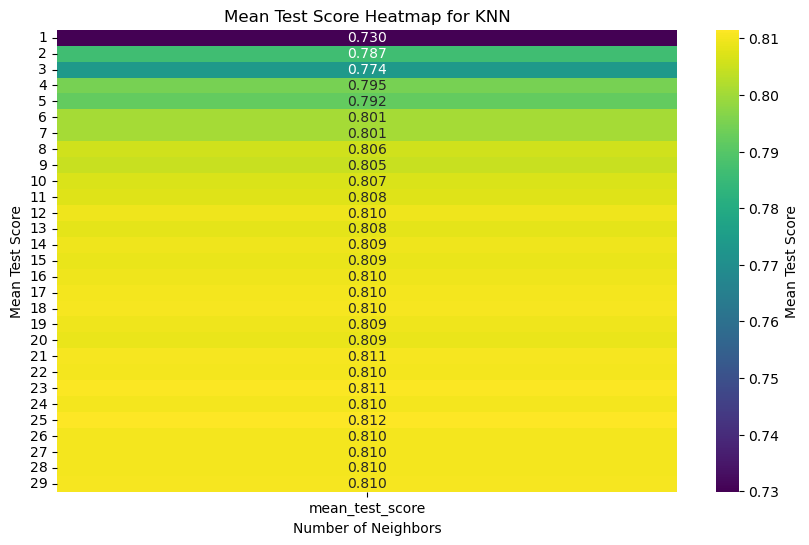

In [22]:
import seaborn as sea

param_dist = {
    'kneighborsclassifier__n_neighbors': list(range(1, 30))
}

random_search_knn = RandomizedSearchCV(
    knn_pipe, 
    param_distributions=param_dist, 
    n_iter=30,
    cv=5,
    n_jobs=-1, 
    verbose=1, 
    random_state=123
)

random_search_knn.fit(X_train, y_train)

print("Best KNN parameters found:", random_search_knn.best_params_)
print("Best cross-validation score:", random_search_knn.best_score_)

best_knn_pipe = random_search_knn.best_estimator_
knn_scores = pd.DataFrame(cross_validate(best_knn_pipe, X_train, y_train, return_train_score=True)).mean()
print("Best KNN CV Scores:", knn_scores)

heatmap_data = pd.DataFrame(random_search_knn.cv_results_)

heatmap_data_pivot = heatmap_data.pivot_table(
    values='mean_test_score', 
    index='param_kneighborsclassifier__n_neighbors', 
)

plt.figure(figsize=(10, 6))
sea.heatmap(heatmap_data_pivot, annot=True, fmt=".3f", cmap='viridis', cbar_kws={'label': 'Mean Test Score'})
plt.title('Mean Test Score Heatmap for KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.show()

Our K-NN Classification mean test score before hyperparameter optimziation was 81.8% and has decreased very slightly to 81.1% after hyperparameter optimization. Our results also show that our most optimal k is 25 and from our heatmap, that is 81.2%. Overall, even though the test score decreased, the overfitting gap significantly decreased. The overfitting gap now is 0.818750 - 0.811476 = 0.007274, with it previously being 0.051.

This means that hyperparameter optimization still managed to have a positive effect on the model and should be included as part of our model building.

Fine tuning using GridSearchCV, refining search around k = 25:

In [23]:
param_grid = {
    'kneighborsclassifier__n_neighbors': list(range(20, 30))
}

grid_search_knn = GridSearchCV(
    knn_pipe, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=1
)

grid_search_knn.fit(X_train, y_train)

print("Best KNN parameters found:", grid_search_knn.best_params_)
print("Best cross-validation score:", grid_search_knn.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best KNN parameters found: {'kneighborsclassifier__n_neighbors': 25}
Best cross-validation score: 0.8115238095238094


The best k is still 25 with the cross-validation score being similar to the mean test score, so we will calculate the final K-NN Classification test score.

In [24]:
best_knn_pipe = grid_search_knn.best_estimator_

knn_test_score = best_knn_pipe.score(X_test, y_test)
print("Best cross-validation score:", grid_search_knn.best_score_)
print(f"Final KNN Test Score: {knn_test_score:.3f}")

Best cross-validation score: 0.8115238095238094
Final KNN Test Score: 0.816


Our final K-NN Test score rounded up is still 81.6%, 0.2% lower than before hyperparameter optimization. This means that our defulat hyperparameters were already quite ideal. 

Now, we will tune our Random Forest model using GridSearchCV

In [25]:
param_grid_rf = {
    'randomforestclassifier__n_estimators': [50, 100, 200, 300, 400],
    'randomforestclassifier__max_depth': [3, 5, 7, 10, 15, None]
}

rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=40))

grid_search_rf = GridSearchCV(
    rf_pipeline, 
    param_grid=param_grid_rf, 
    cv=5, 
    n_jobs=-1, 
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

best_rf_params = grid_search_rf.best_params_
best_rf_score = grid_search_rf.best_score_

print("Best Random Forest parameters found:", best_rf_params)
print(f"Best cross-validation score: {best_rf_score:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Random Forest parameters found: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 400}
Best cross-validation score: 0.8180


In [26]:
best_rf_model = grid_search_rf.best_estimator_ 

test_rf_score = best_rf_model.score(X_test, y_test)
print(f"Best cross-validation score: {best_rf_score:.4f}")
print(f"Final RF Test Accuracy: {test_rf_score:.3f}")

Best cross-validation score: 0.8180
Final RF Test Accuracy: 0.820


Now for lightGBM:

In [27]:
lgb_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('kbinsdiscretizer',
                                                  KBinsDiscretizer(n_bins=4),
                                                  ['AGE']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['EDUCATION', 'MARRIAGE']),
                                                 ('passthrough', 'passthrough',
                                                  ['SEX']),
                                                 ('drop', 'drop', ['ID'])])),
                ('lgbmclassifier',
                 LGBMClassifier(max_depth=5, random_state=123, verbose=-1))])

In [28]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'lgbmclassifier__n_estimators': [50, 100, 200, 300, 400],  
    'lgbmclassifier__learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],  
    'lgbmclassifier__max_depth': [3, 5, 7, 10, 15],  
    'lgbmclassifier__num_leaves': [10, 20, 31, 40, 50],  
    'lgbmclassifier__min_child_samples': [5, 10, 20, 30],  
    'lgbmclassifier__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  
    'lgbmclassifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

random_search_lgb = RandomizedSearchCV(
    lgb_pipeline,
    param_distributions=param_dist, 
    n_iter=30,  
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search_lgb.fit(X_train, y_train)

print("Best Parameters:", random_search_lgb.best_params_)
print("Best Cross-Validation Accuracy:", random_search_lgb.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/moirarenata/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/moirarenata/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/moirarenata/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/moirarenata/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/moirarenata/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/deprec

Best Parameters: {'lgbmclassifier__subsample': 0.9, 'lgbmclassifier__num_leaves': 40, 'lgbmclassifier__n_estimators': 200, 'lgbmclassifier__min_child_samples': 5, 'lgbmclassifier__max_depth': 3, 'lgbmclassifier__learning_rate': 0.05, 'lgbmclassifier__colsample_bytree': 0.7}
Best Cross-Validation Accuracy: 0.8211904761904762


In [29]:
best_lgb_model = random_search_lgb.best_estimator_ 

test_lgb_score = best_lgb_model.score(X_test, y_test)
print("Best Cross-Validation Accuracy:", random_search_lgb.best_score_)
print(f"Final LightGBM Test Accuracy: {test_lgb_score:.3f}")

Best Cross-Validation Accuracy: 0.8211904761904762
Final LightGBM Test Accuracy: 0.822


From our hyperparamter optimization using RandomizedSearchCV, we figured out that the best parameters are as follows:  'lgbmclassifier__subsample': 0.9, 'lgbmclassifier__num_leaves': 40, 'lgbmclassifier__n_estimators': 200, 'lgbmclassifier__min_child_samples': 5, 'lgbmclassifier__max_depth': 3, 'lgbmclassifier__learning_rate': 0.05, 'lgbmclassifier__colsample_bytree': 0.7. Furthermore, the the mean test score also increased from 81.8% to 82.2%, suggesting that this hyperparameter optimization has helped improved the model.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

Using SHAP, we created a SHAP summary plot to examine which are the most important features from our lightGBM model.

In [30]:
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=preprocessor.get_feature_names_out(),
    index=X_train.index,
)
X_train_enc.head()

,kbinsdiscretizer__AGE_0.0,kbinsdiscretizer__AGE_1.0,kbinsdiscretizer__AGE_2.0,kbinsdiscretizer__AGE_3.0,standardscaler__LIMIT_BAL,standardscaler__PAY_0,standardscaler__PAY_2,standardscaler__PAY_3,standardscaler__PAY_4,standardscaler__PAY_5,...,onehotencoder__EDUCATION_2,onehotencoder__EDUCATION_3,onehotencoder__EDUCATION_4,onehotencoder__EDUCATION_5,onehotencoder__EDUCATION_6,onehotencoder__MARRIAGE_0,onehotencoder__MARRIAGE_1,onehotencoder__MARRIAGE_2,onehotencoder__MARRIAGE_3,passthrough__SEX
16395,0.0,0.0,1.0,0.0,1.168355,0.013770,0.114774,0.143483,0.192754,0.232531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
21448,0.0,1.0,0.0,0.0,2.090017,-0.878738,-0.722412,-0.692571,0.192754,0.232531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
20034,0.0,0.0,0.0,1.0,-0.060527,-1.771246,-1.559598,-1.528626,-1.518801,-1.526210,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
25755,0.0,1.0,0.0,0.0,-0.367748,0.013770,0.114774,0.143483,0.192754,0.232531,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1438,0.0,0.0,0.0,1.0,-0.905384,0.906278,1.789147,0.143483,0.192754,0.232531,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [31]:
model = lgb_pipeline.named_steps["lgbmclassifier"]
model.fit(X_train_enc, y_train)
X_train_enc = preprocessor.transform(X_train)
X_test_enc = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()

X_train_enc = pd.DataFrame(X_train_enc, columns=feature_names)
X_test_enc = pd.DataFrame(X_test_enc, columns=feature_names)

In [32]:
!pip install shap

In [33]:
import shap 

explainer = shap.TreeExplainer(model) 
train_shap_values = explainer(X_train_enc) 
test_shap_values = explainer(X_test_enc)

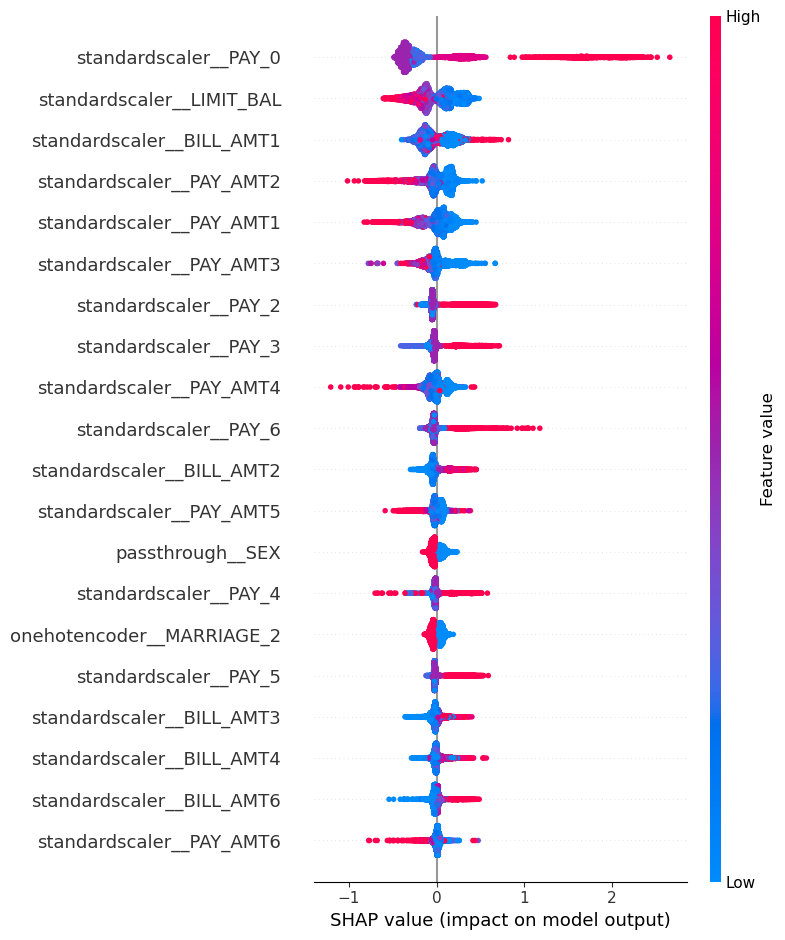

In [34]:

explainer = shap.TreeExplainer(model)
shap.summary_plot(test_shap_values, X_test_enc)

- The most influential feature in predicting defaults is PAY_0 (Repayment Status) and therefore should be considered a strong signal in predicting defaults. If a customer has recently missed payments (high PAY_0 value), the model predicts a higher likelihood of default. This means that Customers with on-time payments (low PAY_0) are predicted as less likely to default.
- Credit limit (LIMIT_BAL) has a strong inverse relationship with defaulting. Having a higher credit limits (red) reduces the likelihood of default. Lower credit limits (blue) increase the likelihood of default.
- Past bill amounts (BILL_AMT1) and payment amounts (PAY_AMT1, PAY_AMT2, etc.) also influence predictions. Higher past bill amounts increase the likelihood of default. Higher repayment amounts reduce the likelihood of default.
 - The features ID, SEX, BILL_AMT6 contribute minimally to predictions and could be removed in feature selection.

What could the business do:
- Focus on monitoring repayment history (PAY_0).
- Consider increasing credit limits for responsible borrowers (LIMIT_BAL).
- Use past bill amounts (BILL_AMT1) to identify high-risk borrowers early.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

Our best performing model was our Light Gradient Boosting Classifier model, where we used the LightGBM model for speed with a mean test score of 82%. We will now fit it on the full training set, predict, and caclulate the accuracy as well as other classification metrics.

In [35]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_lgb_model.predict(X_test)

test_accuracy_lgb = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy_lgb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8224

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      7052
           1       0.66      0.37      0.48      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



Our model’s overall accuracy is relatively high at 82%, but looking at the precision, recall, and F1-score for class 1 closer shows a significant imbalance. Class 1 performance is much lower than class 0, likely because the model favors class 0 due to a larger data representation (7052 vs. 1948 instances).

This imbalance is pretty clear due to the high recall for class 0 and low recall for class 1, with the model missing 63% (1 - 0.37) of actual class 1 cases. As a result, the model struggles to effectively identify class 1 cases, limiting its usefulness for detecting class 1 (the defaulted class)

To address this issue, we can apply class imbalance techniques such as adjusting class weights, using SMOTE (Synthetic Minority Over-sampling Technique), or re-sampling methods to improve recall for class 1 while maintaining overall model performance.

In [36]:
cv_results = cross_validate(best_lgb_model, X_train, y_train, cv=5, return_train_score=True)
cv_train_score = cv_results["train_score"].mean()
cv_test_score = cv_results["test_score"].mean()

print(f"Mean Cross-Validation Train Score: {cv_train_score:.4f}")
print(f"Mean Cross-Validation Test Score: {cv_test_score:.4f}")
print(f"Test Set Score: {test_accuracy_lgb:.4f}")

if abs(cv_test_score - test_accuracy_lgb) > 0.05:
    print("Potential overfitting or optimization bias detected.")
else:
    print("Test performance aligns well with validation scores.")

Mean Cross-Validation Train Score: 0.8262
Mean Cross-Validation Test Score: 0.8212
Test Set Score: 0.8224
Test performance aligns well with validation scores.


Now, using a SHAP force plot.

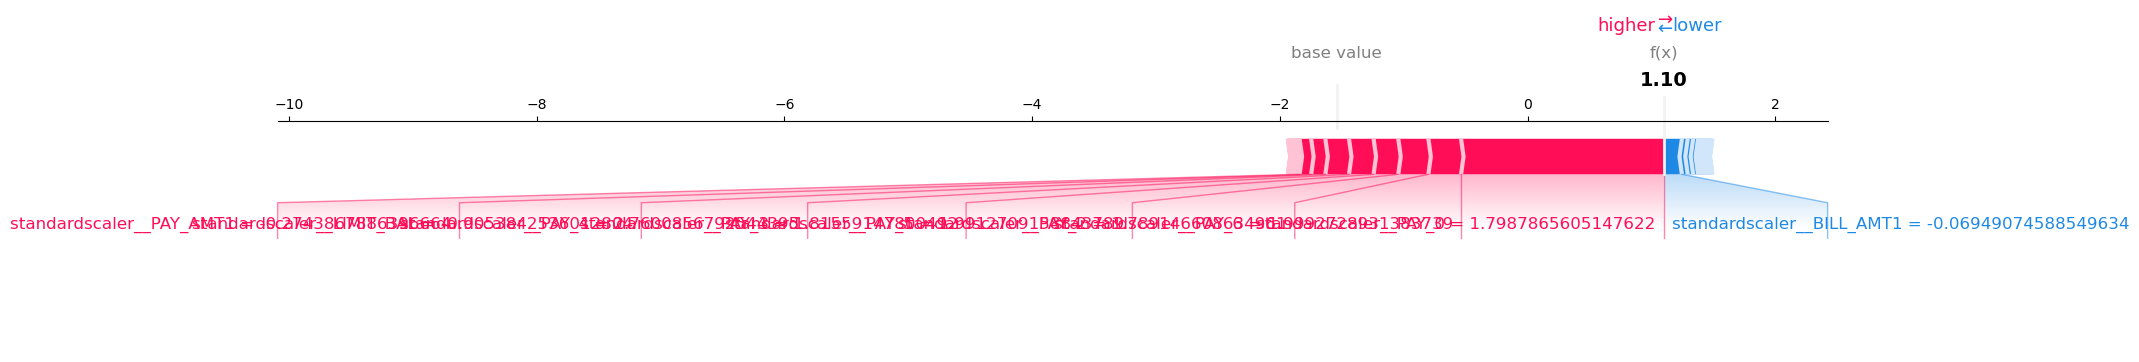

In [37]:
import shap

shap.initjs()

ex1_idx = 10
ex2_idx = 68

plt.style.use("default")
plt.rcParams["figure.facecolor"] = "white"

shap.force_plot(explainer.expected_value, test_shap_values.values[ex1_idx, :], X_test_enc.iloc[ex1_idx, :], matplotlib=True)

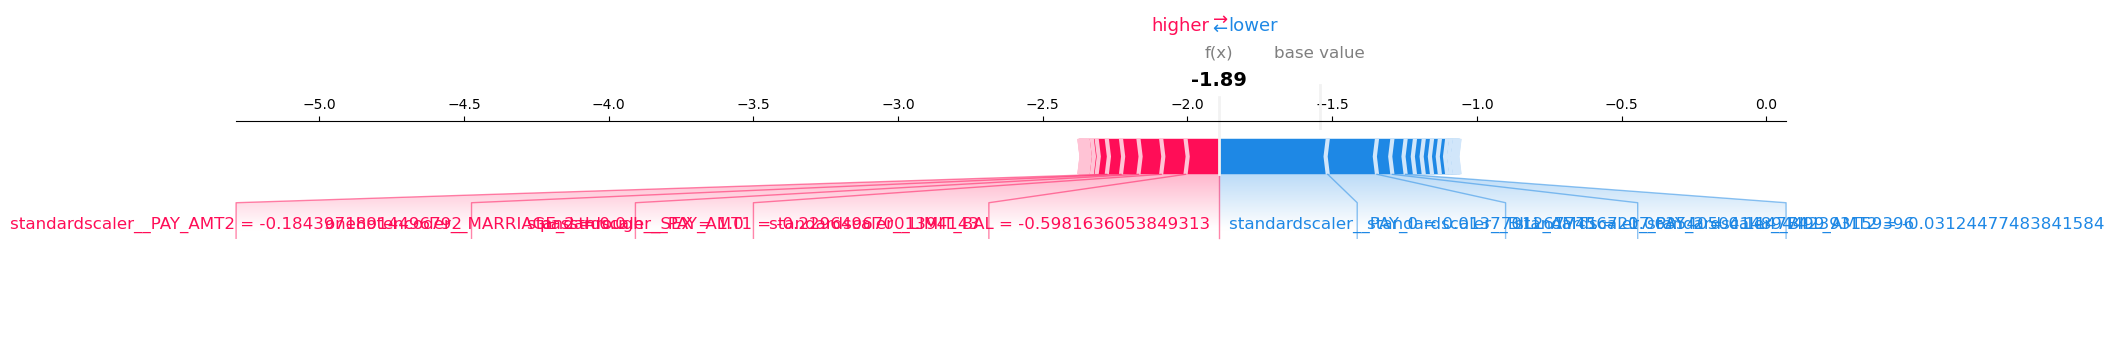

In [38]:
shap.force_plot(explainer.expected_value, test_shap_values.values[ex2_idx, :], X_test_enc.iloc[ex2_idx, :], matplotlib=True)

From our 2 shap force plots, we predicted plotted index 10 and 68 respectively. Index 10's output was 1.1 which suggests a strong push towards a positive classification. The feature PAY_AMT2 strongly increases the prediction (red), while BILL_AMT1 slightly decreases the prediction (blue).

Index 68's output was -1.89, which suggests a stronger push towards a negative classification and meaning the model predicts a lower probability for the positive class. We can also see that PAY_AMT2 and MARRIAGE decrease the prediction significantly (red). 


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [39]:
random_search_lgb.best_score_

0.8211904761904762

In [40]:
results = pd.DataFrame({
    'Model': ['Light Gradient Boosting', 'Random Forest', 'k-Nearest Neighbors'],
    'Mean CV Score': [random_search_lgb.best_score_, grid_search_rf.best_score_, knn_scores['train_score']],
    'Test Accuracy': [test_lgb_score, test_rf_score, knn_test_score],
    'Overfitting': ['Low', 'Low', 'Low'],
})

print(results)

                     Model  Mean CV Score  Test Accuracy Overfitting
0  Light Gradient Boosting       0.821190       0.822444         Low
1            Random Forest       0.818000       0.820000         Low
2      k-Nearest Neighbors       0.818774       0.816222         Low


In this analysis, we evaluated three machine learning models: Light Gradient Boosting Machine (LGBM), Random Forest, and k-Nearest Neighbors (kNN) to predict credit card default risk.

The LightGBM model performed the best overall, achieving a mean cross-validation score of 0.821 and a test accuracy of 0.822, with low overfitting, meaning it generalizes well to new data. Random Forest followed closely with a mean CV score of 0.818 and a test accuracy of 0.82, also showing low overfitting. k-Nearest Neighbors had the lowest accuracy (0.816) but maintained stable performance, indicating that it may require further hyperparameter tuning to improve.

There are some things we could do to improve accuracy: 
- Handling Class Imbalance: The default cases are underrepresented, techniques like class weighting, oversampling, or undersampling could improve predictions.
- Feature Engineering: Adding new features, such as averages of past payments or bill amounts, could improve model performance by capturing more predictive signals.
- Hyperparameter Tuning: Further optimizing model parameters (e.g., number of trees in Random Forest, number of neighbors in kNN) may lead to better results.

The LightGBM model is the best-performing model, showing both high accuracy and low overfitting. The Random Forest model is a strong alternative, while kNN requires further tuning. Feature engineering and class balancing could further improve performance.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

My biggest takeaway from supervised machine learning is the importance of techniques like cross-validation, hyperparameter tuning, and feature engineering/selection in optimizing trade-offs such as overfitting. These methods help ensure that the model remains both accurate and generalizable to unseen data.

Since the three models we tested had very similar accuracies, the choice ultimately depends on the business case and priorities. In some scenarios, a simpler model with slightly lower accuracy may be preferred over a complex one due to interpretability and ease of deployment.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)